# Kapitel 4: Rasterdaten

In [1]:
import geoutils

In [2]:
url = "https://naciscdn.org/naturalearth/10m/raster/NE2_HR_LC_SR_W.zip"

In [3]:
geoutils.download(url, "geodata/ne_raster.zip", False)

File already exists, not overwriting.


In [4]:
from zipfile import ZipFile
import os

def unzip(source, dest):
    zz = ZipFile(source, "r")
    for item in zz.infolist():
        path = dest + "/" + item.filename
        if not os.path.exists(path):
            zz.extract(item, dest)
    zz.close()

In [5]:
unzip("geodata/ne_raster.zip", "geodata")

In [6]:
!gdalinfo geodata/NE2_HR_LC_SR_W.tif

Driver: GTiff/GeoTIFF
Files: geodata/NE2_HR_LC_SR_W.tif
Size is 21600, 10800
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["World"],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-180.000000000000000,90.000000000000014)
Pixel Size = (0.016666666666670,-0.016666666666670)
Metadata:
  AREA_OR_POINT=Area
  TIFFTAG_DATETIME=2012:07:16 09:53:38
  TIFFTAG_RESOLUTIONUNIT=2 (pixels/inch)
  TIFFTAG_SOFTWARE=Adobe Photoshop CS5 Macintosh
  TIF

### JPEG Kompression im Tif

In [7]:
!gdal_translate -of GTiff -co COMPRESS=JPEG -a_srs EPSG:4326 -a_ullr -180 90 180 -90 geodata/NE2_HR_LC_SR_W.tif geodata/world.tif

^C


Input file size is 21600, 10800
0...10...20...30...40...50...60...70...80...90...100 - done.


### Bildgrösse ändern

In [ ]:
21600 * 10800 * 3 / 1024 / 1024

667.41943359375

In [ ]:
!gdal_translate -outsize 2048 1024 geodata/NE2_HR_LC_SR_W.tif geodata/world_small.tif

Input file size is 21600, 10800
0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
!gdalinfo geodata/world_small.tif

Driver: GTiff/GeoTIFF
Files: geodata/world_small.tif
Size is 2048, 1024
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["World"],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-180.000000000000000,90.000000000000014)
Pixel Size = (0.175781250000035,-0.175781250000035)
Metadata:
  AREA_OR_POINT=Area
  TIFFTAG_DATETIME=2012:07:16 09:53:38
  TIFFTAG_RESOLUTIONUNIT=2 (pixels/inch)
  TIFFTAG_SOFTWARE=Adobe Photoshop CS5 Macintosh
  TIFFTAG_

Bildseitenverhältnis automatisch berechnen:

In [ ]:
!gdal_translate -outsize 2048 0 geodata/NE2_HR_LC_SR_W.tif geodata/world_small2.tif

Input file size is 21600, 10800
0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
# !gdal_translate -outsize 25% 25% geodata/NE2_HR_LC_SR_W.tif geodata/world_small3.tif

In [ ]:
!gdal_translate -of JPEG -outsize 1024 512 geodata/NE2_HR_LC_SR_W.tif geodata/world_small.jpg

Input file size is 21600, 10800
0...10...20...30...40...50...60...70...80...90...100 - done.


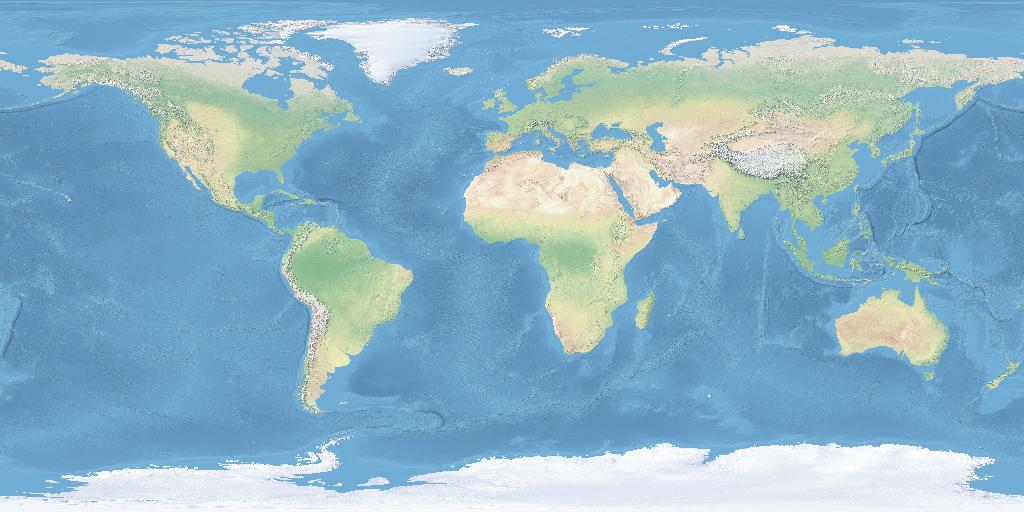

In [ ]:
from IPython.display import Image

Image(filename="geodata/world_small.jpg")

In [ ]:
21600*4

86400

In [ ]:
dest_dir = "geodata/bluemarble"

base = "https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73751/world.topo.bathy.200407.3x21600x21600."
#base = "https://www.geopython.xyz/geodata/bluemarble/july/world.topo.bathy.200407.3x21600x21600."

urls = [base + "A1.png", base + "A2.png",
        base + "B1.png", base + "B2.png", 
        base + "C1.png", base + "C2.png", 
        base + "D1.png", base + "D2.png"]

for url in urls:
    geoutils.download(url, dest_dir + os.path.basename(url), False)

100% done 	[****************************************************************************************************]
100% done 	[****************************************************************************************************]
100% done 	[****************************************************************************************************]
100% done 	[****************************************************************************************************]
100% done 	[****************************************************************************************************]
100% done 	[****************************************************************************************************]
100% done 	[****************************************************************************************************]
100% done 	[****************************************************************************************************]


In [ ]:

!gdal_translate -of GTiff -co TILED=YES -a_srs EPSG:4326 -a_ullr -180 90 -90 0 geodata/bluemarbleworld.topo.bathy.200407.3x21600x21600.A1.png geodata/bluemarble/A1.tif
!gdal_translate -of GTiff -co TILED=YES -a_srs EPSG:4326 -a_ullr -90 90 0 0 geodata/bluemarbleworld.topo.bathy.200407.3x21600x21600.B1.png geodata/bluemarble/B1.tif
!gdal_translate -of GTiff -co TILED=YES -a_srs EPSG:4326 -a_ullr 0 90 90 0 geodata/bluemarbleworld.topo.bathy.200407.3x21600x21600.C1.png geodata/bluemarble/C1.tif
!gdal_translate -of GTiff -co TILED=YES -a_srs EPSG:4326 -a_ullr 90 90 180 0 geodata/bluemarbleworld.topo.bathy.200407.3x21600x21600.D1.png geodata/bluemarble/D1.tif
!gdal_translate -of GTiff -co TILED=YES -a_srs EPSG:4326 -a_ullr -180 0 -90 -90 geodata/bluemarbleworld.topo.bathy.200407.3x21600x21600.A2.png geodata/bluemarble/A2.tif
!gdal_translate -of GTiff -co TILED=YES -a_srs EPSG:4326 -a_ullr -90 0 0 -90 geodata/bluemarbleworld.topo.bathy.200407.3x21600x21600.B2.png geodata/bluemarble/B2.tif
!gdal_translate -of GTiff -co TILED=YES -a_srs EPSG:4326 -a_ullr 0 0 90 -90 geodata/bluemarbleworld.topo.bathy.200407.3x21600x21600.C2.png geodata/bluemarble/C2.tif
!gdal_translate -of GTiff -co TILED=YES -a_srs EPSG:4326 -a_ullr 90 0 180 -90 geodata/bluemarbleworld.topo.bathy.200407.3x21600x21600.D2.png geodata/bluemarble/D2.tif

Input file size is 21600, 21600
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 21600, 21600
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 21600, 21600
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 21600, 21600
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 21600, 21600
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 21600, 21600
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 21600, 21600
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 21600, 21600
0...10...20...30...40...50...60...70...80...90...100 - done.


VRT - GDAL Virtual Format

In [ ]:
!gdalbuildvrt geodata/bluemarble.vrt geodata/bluemarble/A1.tif geodata/bluemarble/A2.tif geodata/bluemarble/B1.tif geodata/bluemarble/B2.tif geodata/bluemarble/C1.tif geodata/bluemarble/C2.tif geodata/bluemarble/D1.tif geodata/bluemarble/D2.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
!gdalinfo geodata/bluemarble.vrt

Driver: VRT/Virtual Raster
Files: geodata/bluemarble.vrt
       geodata/bluemarble.vrt.ovr
       geodata\bluemarble/A1.tif
       geodata\bluemarble/A2.tif
       geodata\bluemarble/B1.tif
       geodata\bluemarble/B2.tif
       geodata\bluemarble/C1.tif
       geodata\bluemarble/C2.tif
       geodata\bluemarble/D1.tif
       geodata\bluemarble/D2.tif
Size is 86400, 43200
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-180.000000000000000,90.000000000000000)
Pixel Size

In [ ]:
!gdaladdo -r average geodata/bluemarble.vrt 2 4 8 16 32 

0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
!gdal_translate -of GTiff -co TILED=YES -projwin 5.96 47.81 10.49 45.82 geodata/bluemarble.vrt geodata/ch.tif

Input file size is 86400, 43200
0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
!gdalwarp -s_srs EPSG:4326 -t_srs EPSG:2056 geodata/ch.tif geodata/ch_lv95.tif 

Creating output file that is 1018P x 653L.
Processing geodata/ch.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
!gdalwarp -s_srs EPSG:4326 -t_srs EPSG:3857 geodata/ch.tif geodata/ch_merc.tif 

Creating output file that is 999P x 642L.
Processing geodata/ch.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


## SRTM

In [ ]:
url = "https://www.geopython.xyz/geodata/srtm/srtm_38_03.zip"
# url = "https://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_38_03.zip"

geoutils.download(url, "geodata/srtm_38_03.zip")

100% done 	[****************************************************************************************************]


In [ ]:
unzip("geodata/srtm_38_03.zip", "geodata")

In [ ]:
!gdaldem hillshade geodata/srtm_38_03.tif geodata/hillshade.png

0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
textfile = """0 110 220 110
500 240 250 160
1500 230 220 170
2000 220 220 220 
2500 250 250 250
"""

file = open("geodata/color.txt", "w")
file.write(textfile)
file.close()

In [ ]:
!gdaldem color-relief geodata/srtm_38_03.tif geodata/color.txt geodata/cr.png

0...10...20...30...40...50...60...70...80...90...100 - done.


# Rasterio

In [8]:
import rasterio
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np

In [9]:
dataset = rasterio.open("geodata/world_small.tif")

In [ ]:
dataset.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 2048,
 'height': 1024,
 'count': 3,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.17578125000003517, 0.0, -180.0,
        0.0, -0.17578125000003517, 90.00000000000001)}

In [ ]:
dataset.width

2048

In [ ]:
dataset.crs

CRS.from_epsg(4326)

In [ ]:
dataset.transform

Affine(0.17578125000003517, 0.0, -180.0,
       0.0, -0.17578125000003517, 90.00000000000001)

In [ ]:
dataset.transform * (2047,1023)

(179.82421875007196, -89.82421875003597)

In [ ]:
px,py = ~dataset.transform * (7.482298100109543, 47.30838275734582)

In [ ]:
r = dataset.read(1)
g = dataset.read(2)
b = dataset.read(3)

In [ ]:
r

array([[105, 105, 105, ..., 105, 105, 105],
       [103, 103, 103, ..., 103, 103, 103],
       [105, 105, 105, ..., 106, 105, 106],
       ...,
       [243, 244, 243, ..., 243, 243, 243],
       [239, 239, 238, ..., 239, 238, 238],
       [245, 246, 245, ..., 245, 245, 246]], dtype=uint8)

In [ ]:
rgb = np.dstack((r,g,b))

In [ ]:
rgb

array([[[105, 160, 200],
        [105, 160, 200],
        [105, 160, 200],
        ...,
        [105, 160, 201],
        [105, 160, 200],
        [105, 160, 201]],

       [[103, 158, 197],
        [103, 158, 197],
        [103, 159, 197],
        ...,
        [103, 158, 197],
        [103, 158, 197],
        [103, 158, 197]],

       [[105, 160, 201],
        [105, 160, 201],
        [105, 160, 201],
        ...,
        [106, 160, 202],
        [105, 160, 201],
        [106, 162, 202]],

       ...,

       [[243, 245, 249],
        [244, 245, 249],
        [243, 245, 249],
        ...,
        [243, 245, 249],
        [243, 245, 249],
        [243, 245, 249]],

       [[239, 243, 248],
        [239, 242, 248],
        [238, 242, 247],
        ...,
        [239, 243, 248],
        [238, 243, 248],
        [238, 243, 248]],

       [[245, 246, 250],
        [246, 248, 251],
        [245, 246, 250],
        ...,
        [245, 246, 250],
        [245, 246, 250],
        [246, 247, 251]]

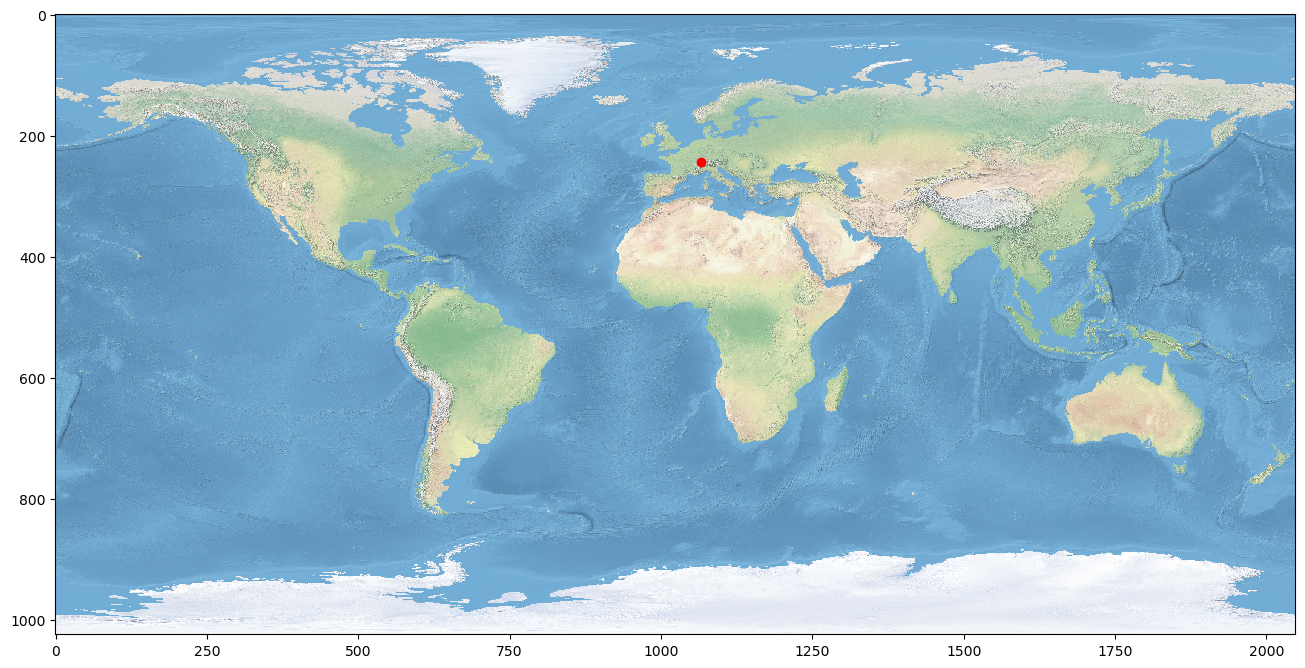

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(rgb, interpolation="nearest")
plt.plot(px,py, "ro")